### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key=" "  # use your key using https://api.tiingo.com/

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-04 00:00:00+00:00,119.03,119.25,115.11,115.29,57776977,27.565989,27.616938,26.658162,26.699848,231107908,0.0,1.0
1,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.81,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0
2,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.86,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0
3,AAPL,2015-12-09 00:00:00+00:00,115.62,117.69,115.08,117.64,46361357,26.776272,27.255660,26.651214,27.244081,185445428,0.0,1.0
4,AAPL,2015-12-10 00:00:00+00:00,116.17,116.94,115.51,116.04,29212727,26.903646,27.081969,26.750797,26.873539,116850908,0.0,1.0


In [43]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,115.17,115.8500,112.59,113.91,113226248,0.0,1.0
1253,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,116.03,116.7500,115.17,115.55,76499234,0.0,1.0
1254,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,116.59,117.4900,116.22,116.57,46691331,0.0,1.0
1255,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,119.05,120.9700,116.81,116.97,169410176,0.0,1.0
1256,AAPL,2020-12-01 00:00:00+00:00,122.72,123.4693,120.01,121.01,125920963,122.72,123.4693,120.01,121.01,125920963,0.0,1.0


In [48]:
df.iloc[1189:,:]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1189,AAPL,2020-08-26 00:00:00+00:00,506.09,507.9700,500.33,504.7165,40755567,126.304349,126.773538,124.866831,125.961566,163022268,0.0,1.0
1190,AAPL,2020-08-27 00:00:00+00:00,500.04,509.9400,495.33,508.5700,38888096,124.794456,127.265189,123.618987,126.923280,155552384,0.0,1.0
1191,AAPL,2020-08-28 00:00:00+00:00,499.23,505.7700,498.31,504.0500,46907479,124.592306,126.224487,124.362702,125.795228,187629916,0.0,1.0
1192,AAPL,2020-08-31 00:00:00+00:00,129.04,131.0000,126.00,127.5800,223505733,128.817508,130.774128,125.782749,127.360025,223505733,0.0,4.0
1193,AAPL,2020-09-01 00:00:00+00:00,134.18,134.8000,130.53,132.7600,152470142,133.948645,134.567576,130.304939,132.531094,152470142,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.9100,113226248,115.170000,115.850000,112.590000,113.910000,113226248,0.0,1.0
1253,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.5500,76499234,116.030000,116.750000,115.170000,115.550000,76499234,0.0,1.0
1254,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.5700,46691331,116.590000,117.490000,116.220000,116.570000,46691331,0.0,1.0
1255,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.9700,169410176,119.050000,120.970000,116.810000,116.970000,169410176,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [44]:
np.max(df1)

1.0

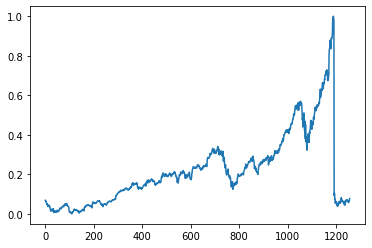

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)

### The public offering price (POP) is the price at which new issues of stock are offered to the public by an underwriter. Because the goal of an initial public offering (IPO) is to raise money, underwriters must determine a public offering price that will be attractive to investors.

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       119.03
1       118.28
2       118.23
3       115.62
4       116.17
         ...  
1252    115.17
1253    116.03
1254    116.59
1255    119.05
1256    122.72
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.06900782]
 [0.06720385]
 [0.06708358]
 ...
 [0.06313891]
 [0.06905592]
 [0.07788334]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.008

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 360ms/step - loss: 0.0116 - val_loss: 0.0528
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0032 - val_loss: 0.0254
Epoch 3/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0011 - val_loss: 0.0217
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 4.9007e-04 - val_loss: 0.0210
Epoch 5/100
12/12 [==============================] - 2s 191ms/step - loss: 3.9079e-04 - val_loss: 0.0200
Epoch 6/100
12/12 [==============================] - 2s 175ms/step - loss: 3.6853e-04 - val_loss: 0.0193
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 3.6288e-04 - val_loss: 0.0186
Epoch 8/100
12/12 [==============================] - 2s 164ms/step - loss: 3.6398e-04 - val_loss: 0.0181
Epoch 9/100
12/12 [==============================] - 2s 185ms/step - loss: 3.2789e-04 - val_loss: 0.0176
Epoch 10/100
12/12 [==============================] - 2s 187ms/step

In [37]:
import tensorflow as tf

In [39]:
tf.__version__

'2.1.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

159.64851314012117

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

269.3130678596508

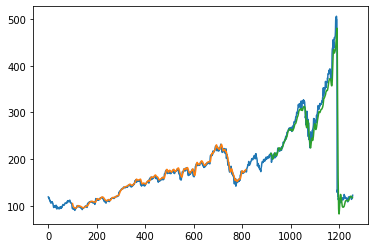

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
len(test_data)

440

In [56]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.06692658]
101
1 day input [0.71651233 0.72293446 0.711365   0.70948888 0.72901984 0.71595911
 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162
 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088
 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044 0.99360192
 0.98366807 1.         0.98544799 0.9834997  0.09308479 0.10544799
 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825
 0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828
 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.

9 day output [[0.07982332]]
10 day input [0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.0597233

18 day input [0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.06692658 0.06910091
 0.07105058 0.07269424 0.07410158 0.07536149 0.076

28 day output [[0.0989701]]
29 day input [0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.06692658
 0.06910091 0.07105058 0.07269424 0.07410158 0.07536149 0.07653771
 0.07766488 0.0787583  0.07982332 0.08086228 0.08187738 0.08287171
 0.08384952 0.08481565 

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1257

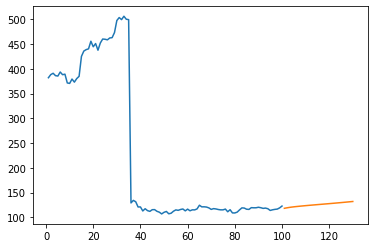

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

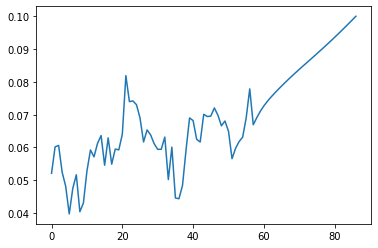

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

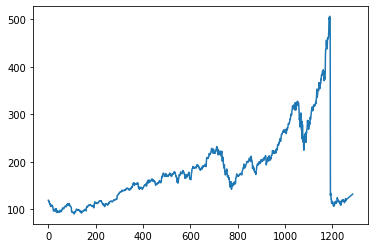

In [66]:
plt.plot(df3)